# Большое ДЗ №1

Выполните задания, указанные в конце ноутбука. Критерий зачета ДЗ - не менее 70% набранных баллов (балы указаны в каждом задании).

# Загрузим датасет - зарплаты IT специалистов в Европе за 2020 год

In [ ]:
# Importing libaries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
path_to_data = 'https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_1/data/IT_EU_2020.csv'
df_2020 = pd.read_csv(path_to_data)
df_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [ ]:
# df_2020.dtypes

In [ ]:
# rename columns
df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

In [ ]:
# categorical features
features_cat = ['Gender', 'City', 'Position',
       'Seniority level', 'Your main technology / programming language',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type']

In [ ]:
features_other = ['Total years of experience','Years of experience in Germany','Other technologies/programming languages you use often',
                  'Number of vacation days','Have you lost your job due to the coronavirus outbreak?']

In [ ]:
# numeric features
features_num = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week']

In [ ]:
# features we ignore in the following
features_not_used = ['Timestamp',
                     'Yearly bonus + stocks in EUR',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country',
                     'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [ ]:
# check if we have captured all features
len(features_cat + features_num + features_not_used) - len(df_2020.columns)

-5

## Очистка данных

In [ ]:
# fill missing values

# categorical features
missing_text = '_MISSING_'
df_2020[features_cat] = df_2020[features_cat].fillna(missing_text)

# numerical features
missing_num = -1
df_2020[features_num] = df_2020[features_num].fillna(missing_num)

In [ ]:
# Removing Outlier using IQR

feature = 'Yearly brutto salary (without bonus and stocks) in EUR'

p25 = df_2020[feature].quantile(0.25) 
p75 = df_2020[feature].quantile(0.75) 
iqr = p75 - p25 

upper_limit = p75 + 1.5 * iqr 
lower_limit = p25 - 1.5 * iqr 

# New DataFrame after removing the outlier 
new_df = df_2020[(df_2020[feature] > lower_limit) & (df_2020[feature] < upper_limit)].copy()

# Checking the difference
diff = df_2020.shape[0] - new_df.shape[0] 

diff

82

In [ ]:
list({i:new_df[i].unique()} for i in features_num)

[{'Age': array([26., 28., 37., 32., 24., 29., 35., -1., 34., 31., 41., 27., 25.,
         59., 36., 38., 40., 39., 30., 49., 33., 48., 44., 66., 45., 43.,
         42., 46., 47., 56., 53., 65., 23., 50., 22., 51., 21., 54., 69.,
         52.])},
 {'Yearly brutto salary (without bonus and stocks) in EUR': array([ 80000.  ,  54000.  ,  62000.  ,  76000.  ,  57000.  ,  65000.  ,
          56000.  ,  95000.  ,  52500.  , 100000.  ,  90000.  ,  70000.  ,
          75000.  ,  60350.  ,  78000.  ,  60000.  , 103000.  ,  69000.  ,
          47400.  ,  67000.  ,  85000.  ,  45000.  ,  63000.  ,  72000.  ,
         105000.  ,  88000.  ,  74000.  ,  77000.  ,  68000.  ,  70500.  ,
          73500.  ,  83000.  , 110000.  ,  93000.  ,  55000.  ,  53000.  ,
          70200.  ,  50000.  ,  68500.  ,  61000.  ,  73000.  ,  81000.  ,
          58000.  ,  79000.  ,  49000.  ,  44000.  ,  48000.  ,  66000.  ,
          51000.  ,  77500.  ,  71060.  ,  28000.  ,  82000.  ,  70800.  ,
          89200.  ,  

In [ ]:
list({i:new_df[i].unique()} for i in features_cat)

[{'Gender': array(['Male', 'Female', '_MISSING_'], dtype=object)},
 {'City': array(['Munich', 'Berlin', 'Hamburg', 'Wolfsburg', 'Stuttgart',
         'Schleswig-Holstein', 'London', 'Konstanz area', 'Frankfurt',
         'Cologne', 'Kempten', 'Münster', 'Erlangen', 'Vienna', 'Moldova',
         'Rosenheim', 'Mannheim ', 'Boeblingen', 'Düsseldorf', 'Ingolstadt',
         'Nürnberg', 'Ansbach', 'Leipzig', 'Mannheim', 'Tuttlingen', 'Bonn',
         'Koblenz', 'Heidelberg', 'Karlsruhe', 'Köln', 'Karlsruhe ',
         'Dusseldorf', 'Helsinki', 'Würzburg', 'Den Haag', 'Amsterdam',
         'Tallinn', 'Utrecht', 'Stockholm', 'Moscow', 'Braunschweig ',
         'Dresden', 'Kyiv', 'Stuttgart ', 'Warsaw', 'Lübeck', 'Nuremberg ',
         'Bodensee', 'Milan', 'Rome', 'Wroclaw', 'Paris', 'Dublin ',
         'Paderborn', 'Konstanz', 'Ulm', 'Düsseldorf ', 'Bölingen',
         'Prague', 'Hannover', 'Siegen', 'Minsk', 'Nuremberg', 'Marseille',
         'Friedrichshafen', 'Walldorf', 'Eindhoven', 'Fran

In [ ]:
# for i in range(len(new_df.index)):
#   if  len(new_df['Total years of experience'].values[i]) > 3:
#     del new_df[new_df.index==i]

In [ ]:
new_df['Have you lost your job due to the coronavirus outbreak?'].value_counts()

No                                                                                        1096
Yes                                                                                         51
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
yes but found a new one with better pay / perks                                              1
Lost the job but for different reason                                                        1
Have been a freelancer at the beginning of year                                              1
Leads and project inquiries have slowed down                                                 1
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
Name: Have you lost your job due to the coronavirus outbreak?, dtype: int64

# Задание 1 (1 балл)
Рассчитайте корреляцию Пирсона для каждого численного признака с целевой переменной (целевая переменная -'Yearly brutto salary (without bonus and stocks) in EUR')

In [ ]:
correlations_data = new_df[features_num].corr()['Yearly brutto salary (without bonus and stocks) in EUR']
print(correlations_data)

Age                                                                                                         0.176961
Yearly brutto salary (without bonus and stocks) in EUR                                                      1.000000
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country    0.377719
Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week          -0.020994
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64


# Задание 2 (1 балл)
Изучите данные при помощи метода ProfileReport из библиотеки pandas_profiling, установите следующие атрибуты для  ProfileReport: explorative=True, minimal=False.

Если работаете в колабе, то обязательно увыполните следующую команду (в пустой ячейке и перезапустите среду в ноутбуке ("Среда выполнения" -> "Перезапустить среду выполнения")
```
!pip3 install pandas-profiling==3.1.0
```

In [ ]:
!pip3 install pandas-profiling==3.1.0

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
new_df.profile_report(explorative=True, minimal=False)

Output hidden; open in https://colab.research.google.com to view.

# Задание 3 (1 балл)
Сделайте краткий вывод по данным, основываясь на отчете ProfileReport. Какие основные проблемы в данных?

Ряд признаков имеет высокую корреляцию с другими признаками. Среди всего датафрейма следует отметить преобладание следующих значений: мужской пол, город Берлин, язык - Английский, бессрочный трудовой договор, полный рабочий день.

# Задание 4 (1 балл)
Расчитайте матрицу корреляций признаков. Используйте метод corr() из библиотеки pandas, а для визуализации - heatmap из библиотеки seaborn (см. пример в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW)

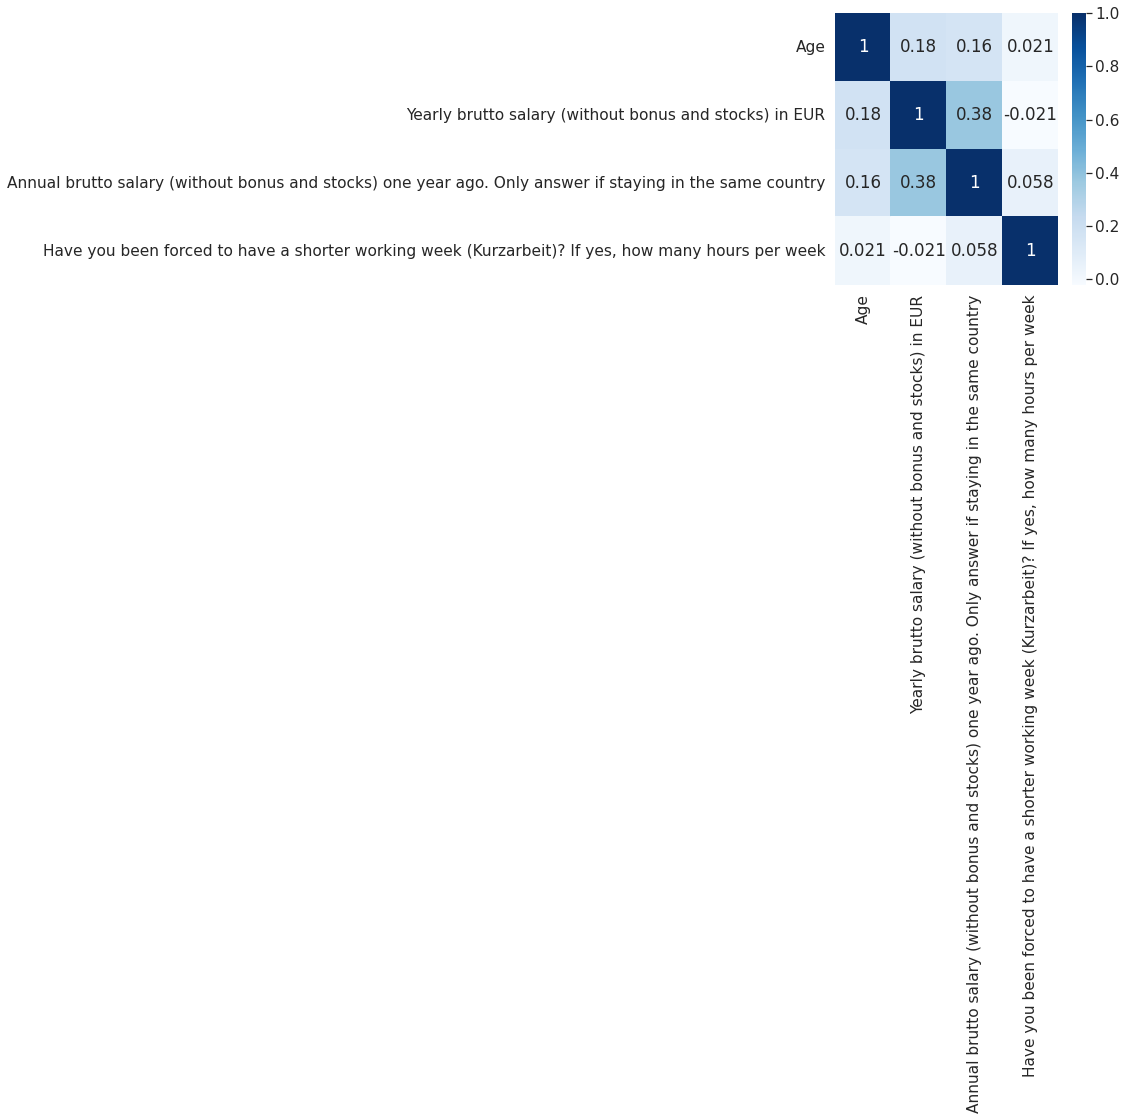

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(5,5))
sns.heatmap(new_df.corr(),cbar=True,cmap='Blues', annot=True)
plt.show() 

# Задание 5 (1.5 балла)

Закодируйте категориальные признаки. Можете использовать любой кодировщик категориальных данных, например: `sklearn.preprocessing.LabelEncoder`,`sklearn.preprocessing.OrdinalEncoder` или`sklearn.preprocessing.OneHotEncoder`.

In [ ]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder() 
from sklearn import preprocessing
onehotencoder = preprocessing.OneHotEncoder()
from sklearn import preprocessing
ordinalencoder = preprocessing.OrdinalEncoder()

In [ ]:
# pd.get_dummies(df_OE.City)

In [ ]:
list({i:onehotencoder.fit_transform(new_df[[i]]).toarray().shape} for i in features_cat)

[{'Gender': (1171, 3)},
 {'City': (1171, 106)},
 {'Position': (1171, 135)},
 {'Seniority level': (1171, 17)},
 {'Your main technology / programming language': (1171, 243)},
 {'Employment status': (1171, 9)},
 {'Сontract duration': (1171, 3)},
 {'Main language at work': (1171, 13)},
 {'Company size': (1171, 6)},
 {'Company type': (1171, 58)}]

In [ ]:
# Разделим категориальные признаки на две гуппы: одна группа для признаков с 10-ю и более значениями, вторая группа для признаков с кол-вом значений менее 10.
features_cat_more10 = ['City', 'Position', 'Seniority level', 'Your main technology / programming language', 'Main language at work', 'Company type', 'Company size'] 
features_cat_less10 = ['Gender', 'Employment status', 'Сontract duration']

In [ ]:
# Закодируем признаки с более чем 10-ю значениями методом OrdinalEncoder
FCM10 = pd.DataFrame(ordinalencoder.fit_transform(new_df[features_cat_more10]), columns = features_cat_more10)
FCM10 

,City,Position,Seniority level,Your main technology / programming language,Main language at work,Company type,Company size
0,70.0,104.0,12.0,195.0,2.0,38.0,3.0
1,4.0,12.0,12.0,162.0,2.0,38.0,1.0
2,4.0,47.0,4.0,93.0,2.0,46.0,3.0
3,4.0,12.0,12.0,28.0,2.0,38.0,1.0
4,4.0,39.0,12.0,9.0,2.0,46.0,2.0
...,...,...,...,...,...,...,...
1166,4.0,12.0,12.0,69.0,2.0,38.0,3.0
1167,4.0,86.0,12.0,213.0,2.0,38.0,0.0
1168,70.0,58.0,6.0,128.0,2.0,56.0,1.0
1169,84.0,47.0,8.0,85.0,5.0,38.0,1.0


In [ ]:
# sns.set(font_scale=1.4)
# plt.figure(figsize=(10,10))
# sns.heatmap(FCM10.corr(),cbar=True,cmap='Blues',annot=True,fmt='.1g')
# plt.show() 

In [ ]:
# Закодируем признаки с менее чем 10-ю значениями методом OneHotEncoder
FCL10 = pd.concat([pd.DataFrame(onehotencoder.fit_transform(new_df[[i]]).toarray(), columns=onehotencoder.categories_) for i in features_cat_less10],axis=1)
FCL10

,Female,Male,_MISSING_,Company Director,Founder,Full-time employee,"Full-time position, part-time position, & self-employed (freelancing, tutoring)",Intern,Part-time employee,Self-employed (freelancer),_MISSING_,"full-time, but 32 hours per week (it was my request, I'm a student)",Temporary contract,Unlimited contract,_MISSING_
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1167,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1168,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1169,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# sns.set(font_scale=1.4)
# plt.figure(figsize=(25,25))
# sns.heatmap(FCL10.corr(),cbar=True,cmap='Blues',annot=True,fmt='.1g')
# plt.show() 

In [ ]:
# Датафейм с числовыми признаками 
FN = new_df[features_num]
FN

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
0,26.0,80000.0,75000.0,-1.0
1,26.0,80000.0,82000.0,-1.0
3,28.0,54000.0,-1.0,-1.0
4,37.0,62000.0,62000.0,-1.0
5,32.0,76000.0,76000.0,-1.0
...,...,...,...,...
1248,31.0,70000.0,70000.0,-1.0
1249,33.0,60000.0,48000.0,-1.0
1250,39.0,110000.0,90000.0,-1.0
1251,26.0,38350.0,33800.0,-1.0


In [ ]:
# Объединим датафреймы с категориальными и числовыми признаками 
cod_df = pd.concat([FN,FCM10,FCL10],axis=1)
cod_df

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",City,Position,Seniority level,Your main technology / programming language,Main language at work,Company type,Company size,"(Female,)","(Male,)","(_MISSING_,)","(Company Director,)","(Founder,)","(Full-time employee,)","(Full-time position, part-time position, & self-employed (freelancing, tutoring),)","(Intern,)","(Part-time employee,)","(Self-employed (freelancer),)","(_MISSING_,)","(full-time, but 32 hours per week (it was my request, I'm a student),)","(Temporary contract,)","(Unlimited contract,)","(_MISSING_,)"
0,26.0,80000.0,75000.0,-1.0,70.0,104.0,12.0,195.0,2.0,38.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26.0,80000.0,82000.0,-1.0,4.0,12.0,12.0,162.0,2.0,38.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,NaN,NaN,NaN,NaN,4.0,47.0,4.0,93.0,2.0,46.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28.0,54000.0,-1.0,-1.0,4.0,12.0,12.0,28.0,2.0,38.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,37.0,62000.0,62000.0,-1.0,4.0,39.0,12.0,9.0,2.0,46.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,70000.0,70000.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1249,33.0,60000.0,48000.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,39.0,110000.0,90000.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,26.0,38350.0,33800.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Задание 6 (1.5 балла)
После кодирования категориальных признаков в числовые - еще раз рассчитайте и отобразите матрицу корреляций. Удалите фичи, у которых корреляция >0.6 или (<-0.6). Не забывайте что отрицательная корреляция - тоже мера зависимости!

In [ ]:
cordf = cod_df.corr().round(2)

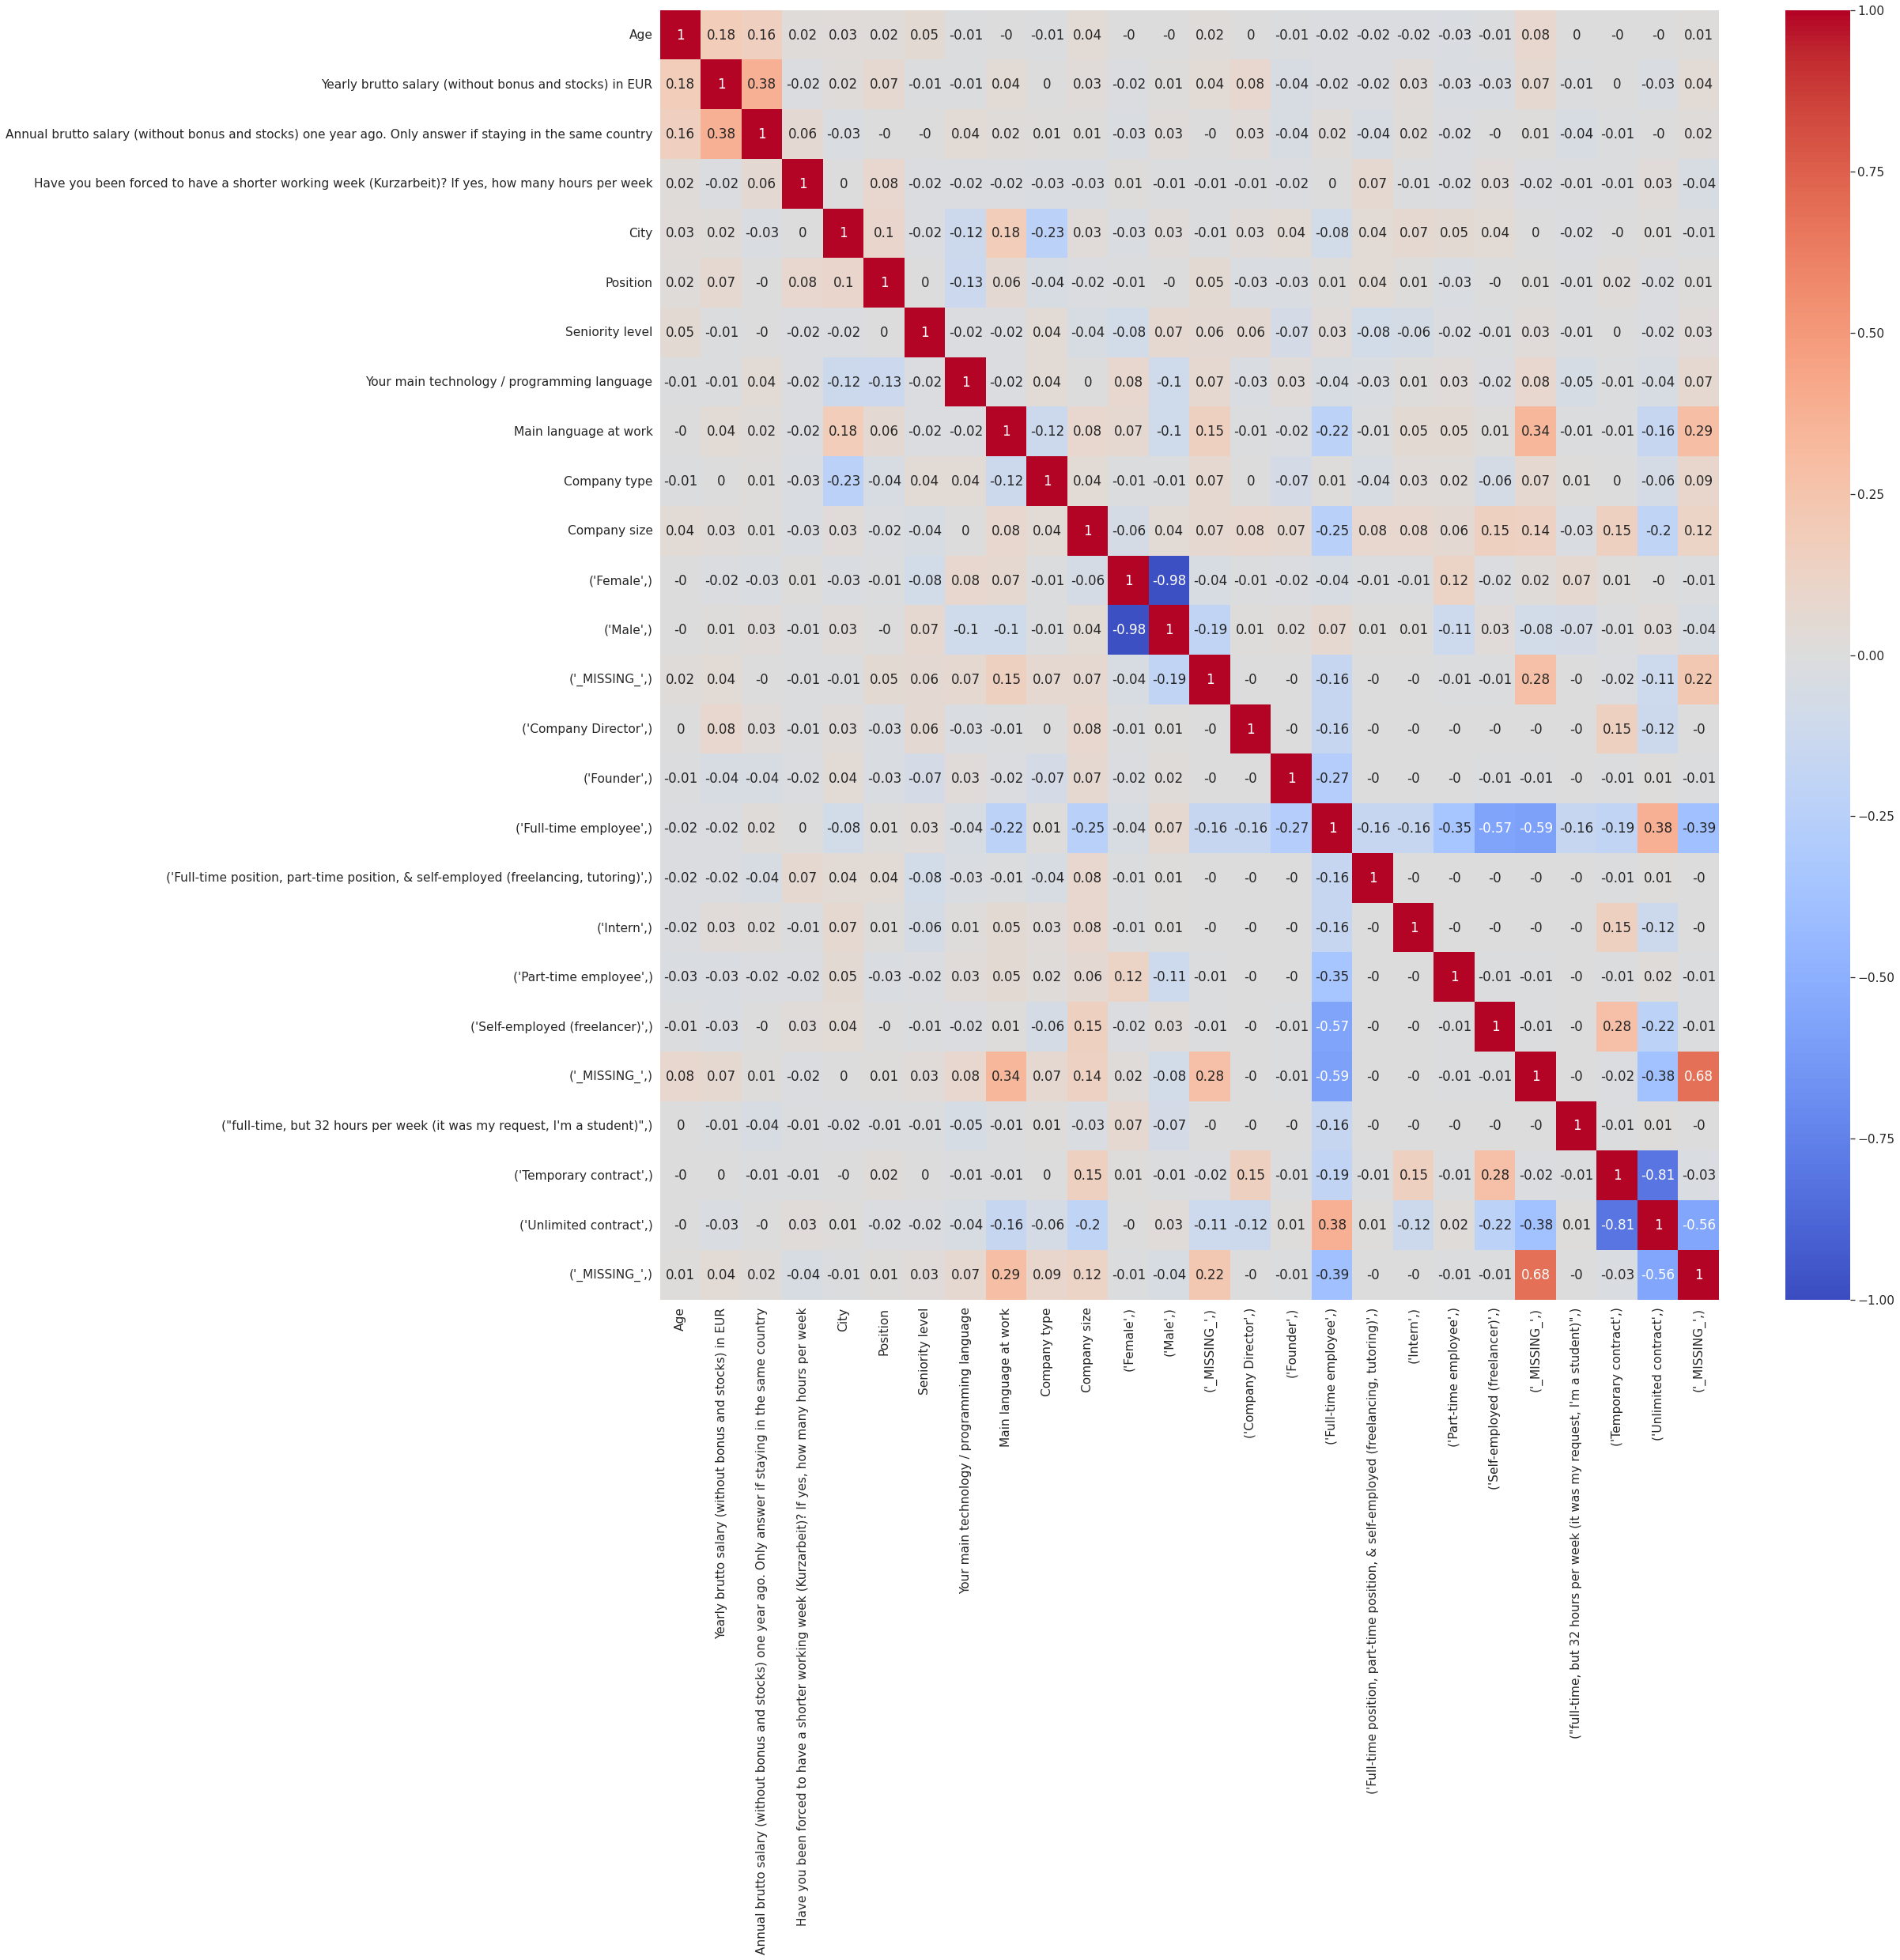

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(30,30))
sns.heatmap(cordf,cbar=True,annot=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show() 

In [ ]:
# Найдем столбцы, у которых корреляция >0.6 или (<-0.6)
cor06 = (cordf != 1) & (cordf>=0.6) | (cordf<=-0.6)
list_cor06 = list(cor06[cor06 == True].dropna(how='all', axis=1).columns)
# Удалим найленые столбцы из матрицы корреляций 
cordf = cordf.drop(list_cor06, axis=1)

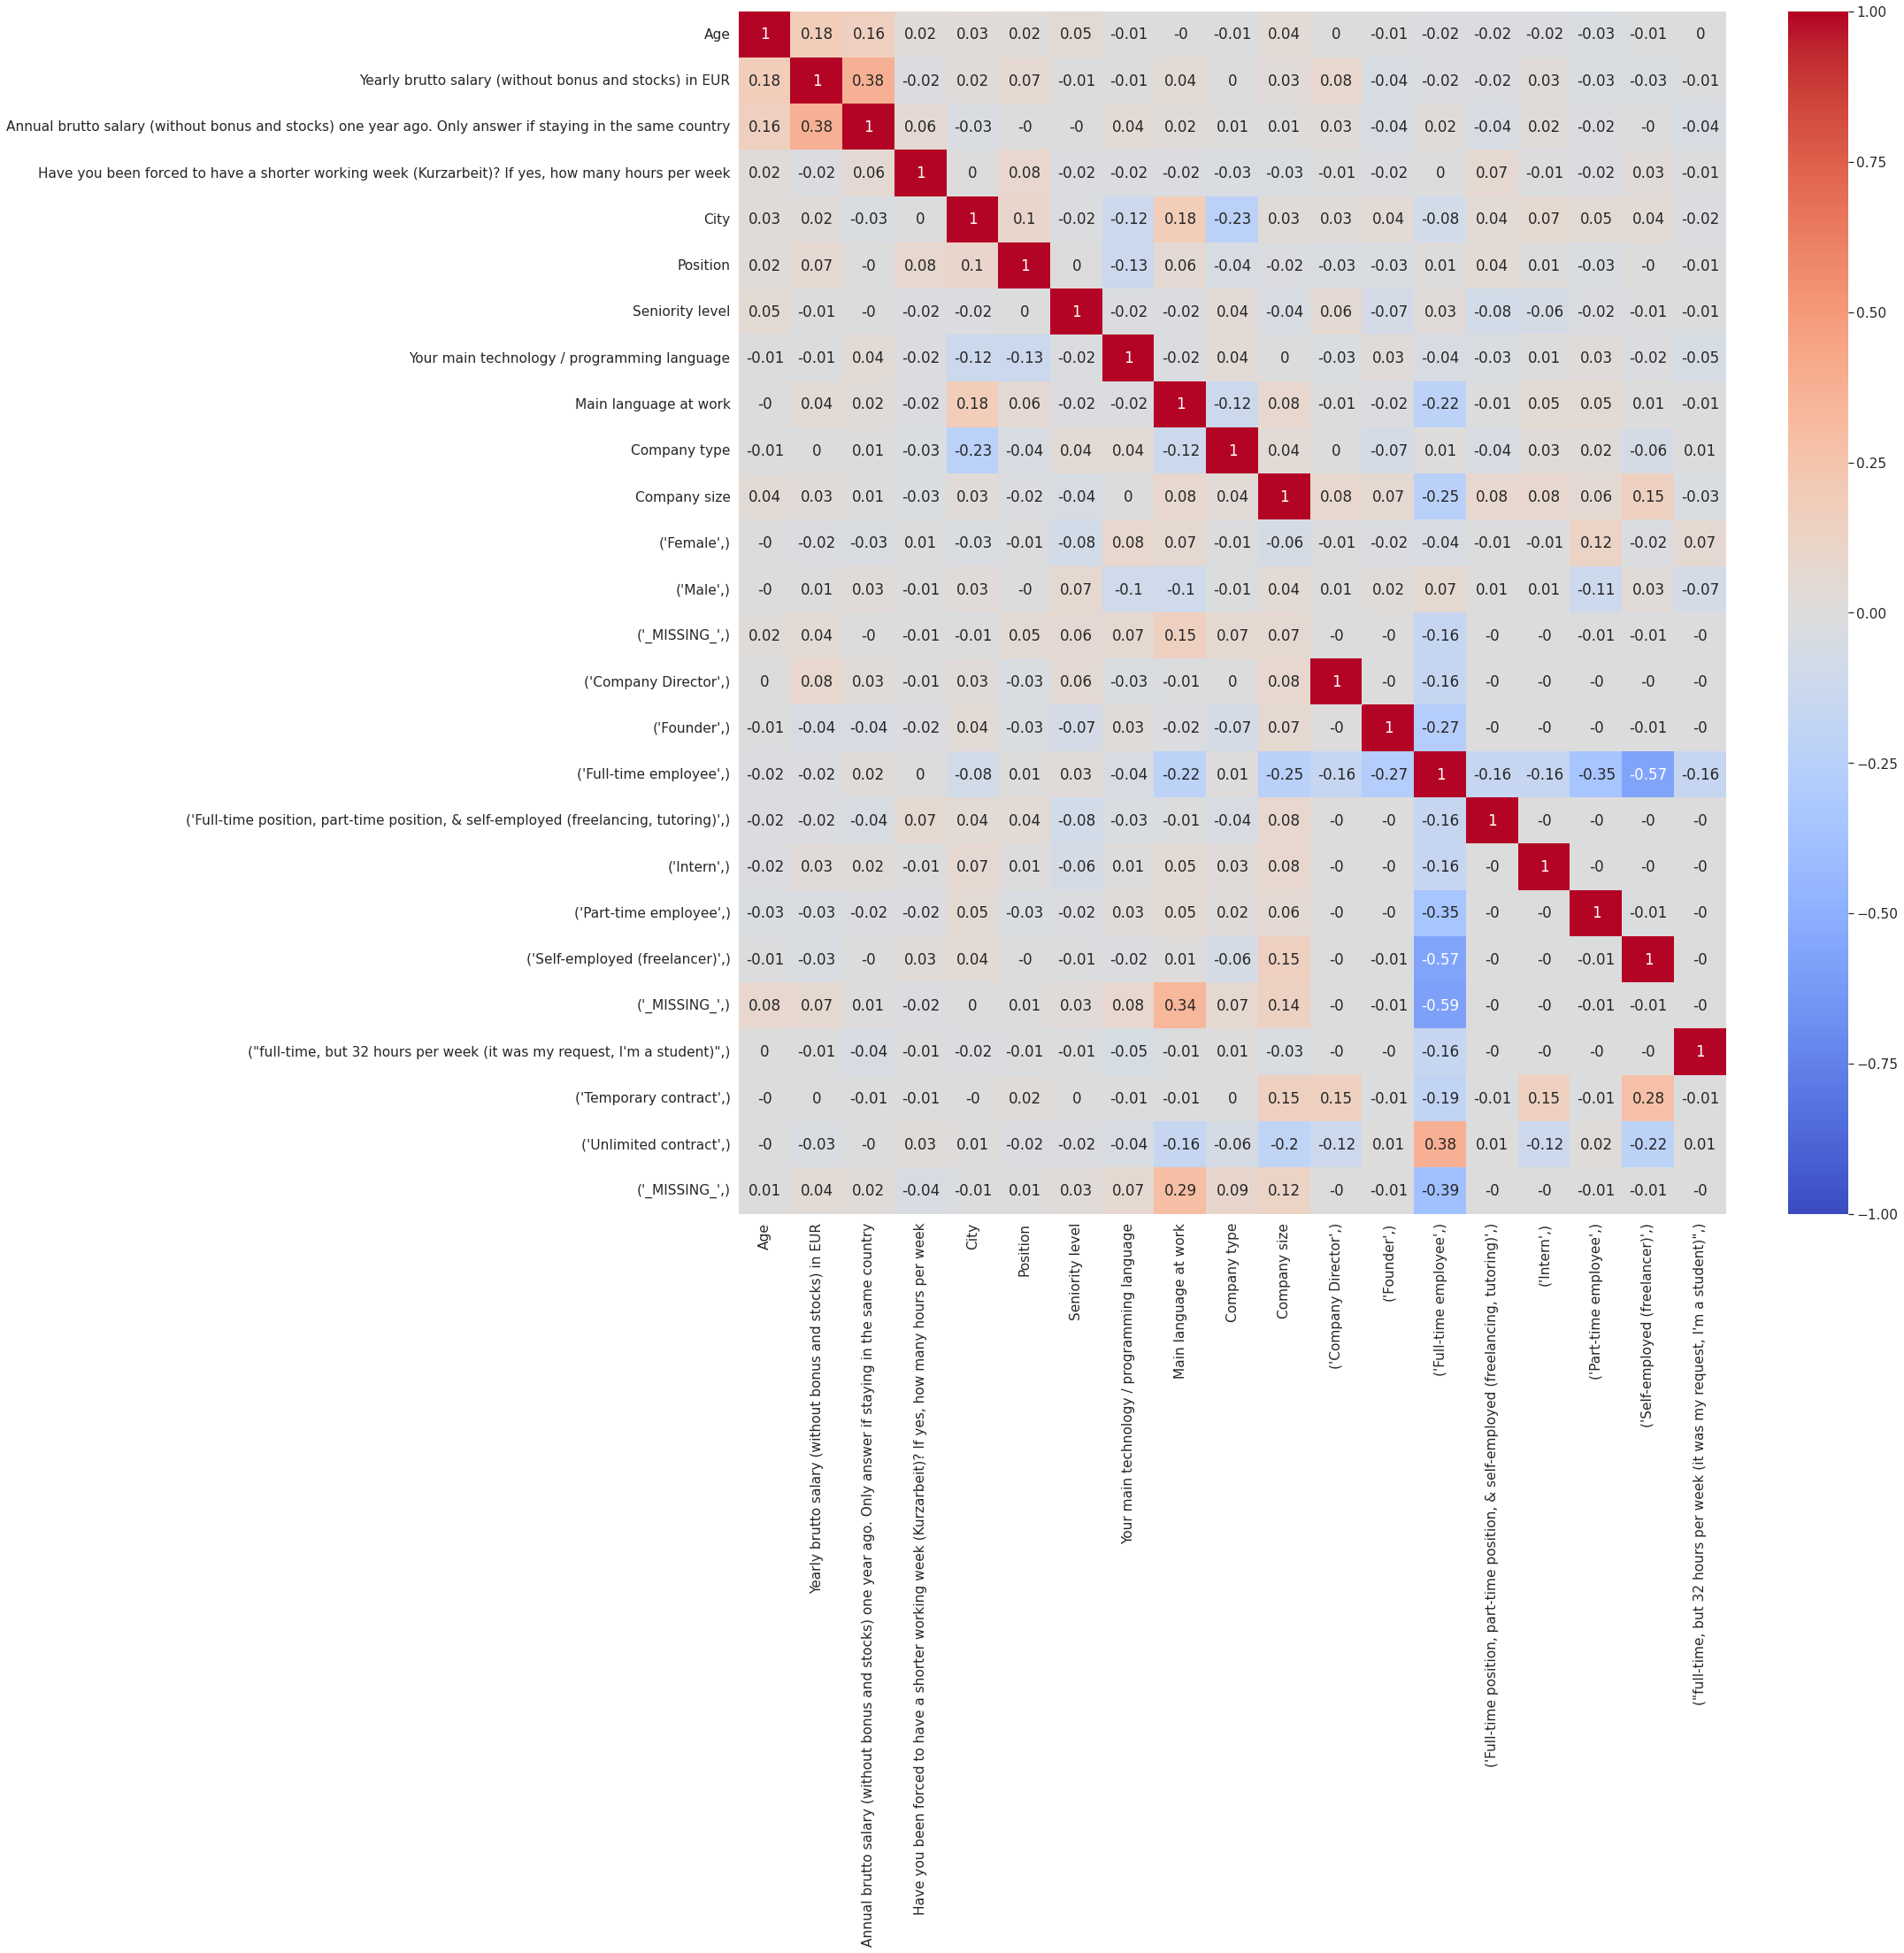

In [ ]:
# Постоим новый heatmap
sns.set(font_scale=1.4)
plt.figure(figsize=(25,25))
sns.heatmap(cordf,cbar=True,annot=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show() 

# Задание 7 (1.5 балла)
Приведите пример распределения признака с выбросами (можете привести любой из выборки, кроме указанного выше в ноутбуке). Удалите выбросы с использованием правила "68-95-99.7", то есть оставьте те значения, которые попадают в диапазон: среднее значение +- 3 стандартных отклонения. Пример реализации можно посмотреть в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW. Не перепутайте с примером интерквартильного размаха!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


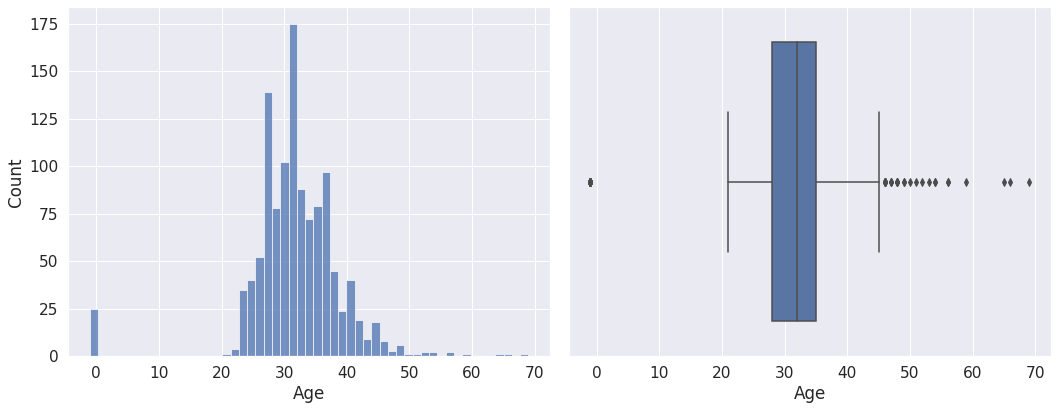

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(new_df['Age'], ax=ax1)
sns.boxplot(new_df['Age'],ax=ax2)

plt.tight_layout()
plt.show()

In [ ]:
max = new_df['Age'].mean() + new_df['Age'].std()*3
min = new_df['Age'].mean() - new_df['Age'].std()*3
# new_df7['Yearly bonus + stocks in EUR'].std()
max,min

(54.080774256188604, 9.65961857045529)

In [ ]:
new_df = new_df[(new_df['Age'] > min) &
            (new_df['Age'] < max)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


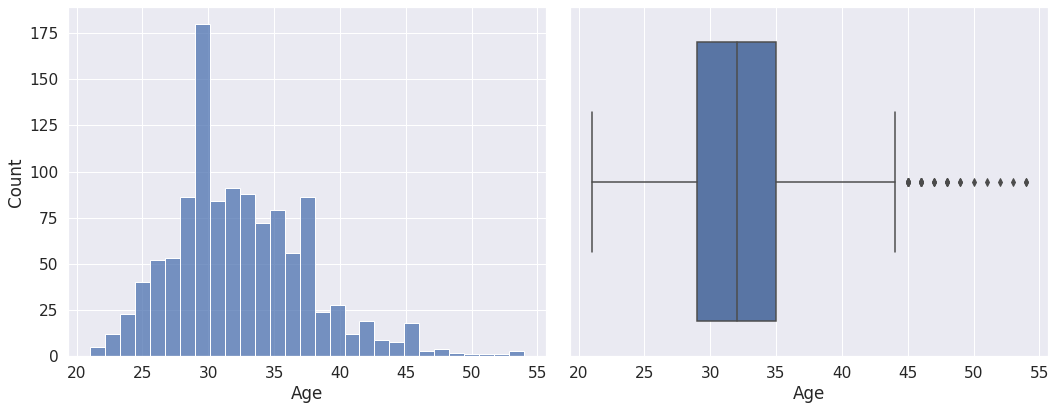

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(new_df['Age'], ax=ax1)
sns.boxplot(new_df['Age'],ax=ax2)

plt.tight_layout()
plt.show()

# Задание 8 (1 балл)
Постройте несколько distplot (с использованием seaborn) для 3ех произвольных числовых признаков.

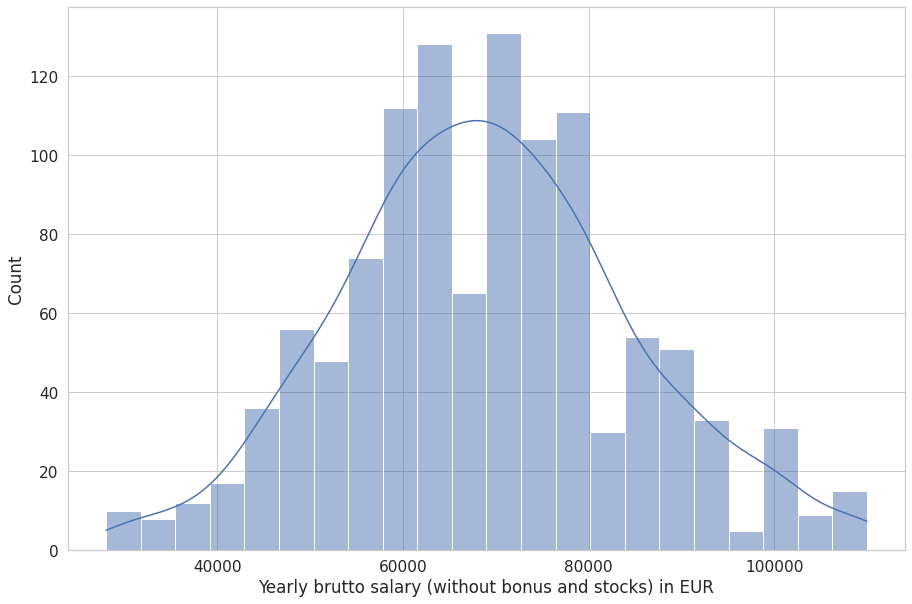

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
# sns.displot(new_df['Yearly brutto salary (without bonus and stocks) in EUR'],kde=True)
ax = sns.histplot(data=new_df,x='Yearly brutto salary (without bonus and stocks) in EUR',kde=True)
plt.show() 

In [ ]:
# Перед построением графика очистим признак от выбросов 

feature = 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'

p25 = new_df[feature].quantile(0.25) 
p75 = new_df[feature].quantile(0.75) 
iqr = p75 - p25 

upper_limit = p75 + 1.5 * iqr 
lower_limit = p25 - 1.5 * iqr 

# New DataFrame after removing the outlier 
new_df = new_df[(new_df[feature] > lower_limit) & (new_df[feature] < upper_limit)].copy()

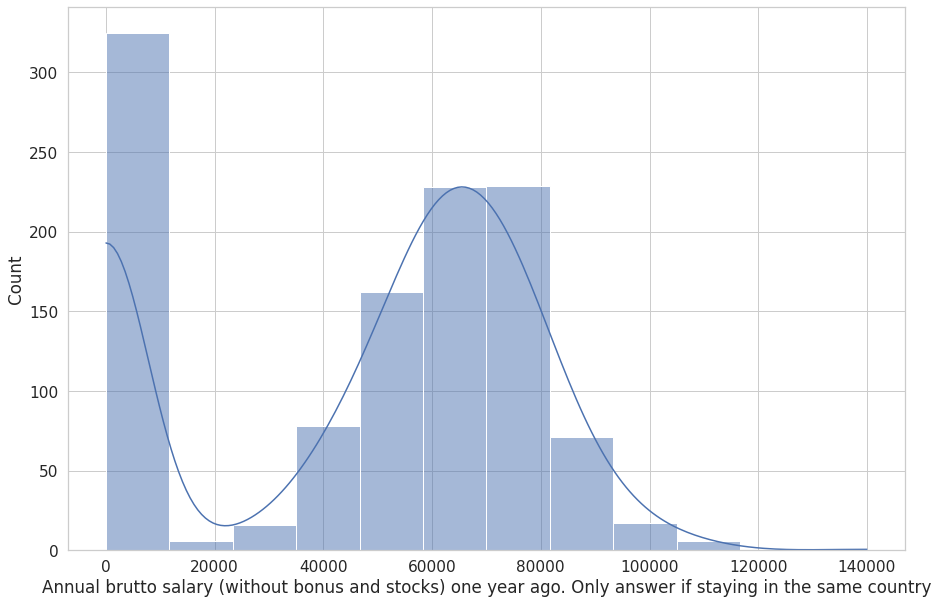

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.histplot(data=new_df,x='Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',kde=True)
plt.show() 

Первая колонка содержит значения равные -1 (бывшие NaN).  

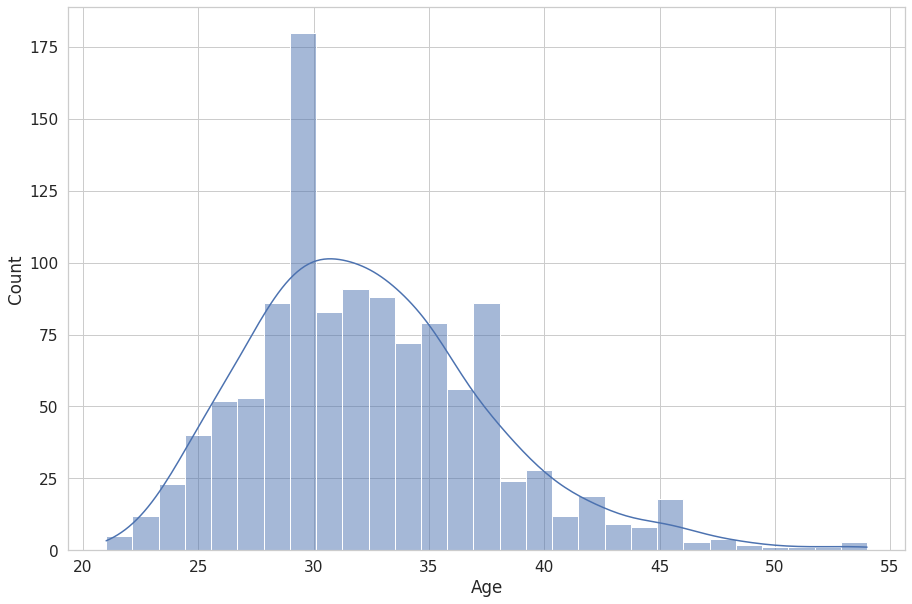

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.histplot(data=new_df,x='Age',kde=True)
plt.show() 

Первая колонка содержит значения равные -1 (бывшие NaN). 

# Задание 9 (1.5 балла)
Проведите bivariate analysis: постройте scatter plots различных фичей ( а также фичей с целей переменной). Видите ли вы какие-то зависимости? Может есть гипотезы? Постройте не менее 3ех графиков + краткие выводы по каждому.

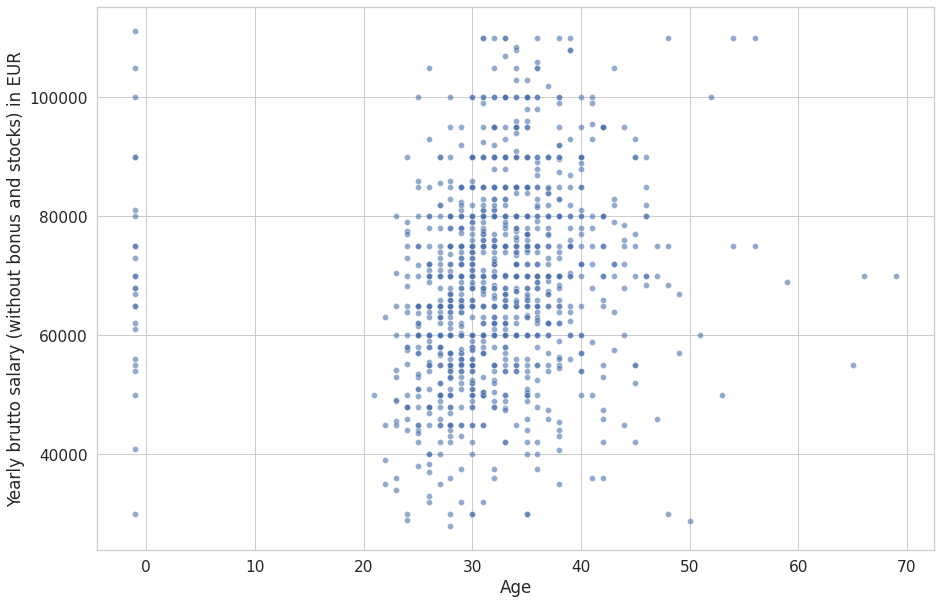

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.scatterplot(data=cod_df, x="Age", y="Yearly brutto salary (without bonus and stocks) in EUR", alpha=0.6)
# , hue="City", size="City", alpha=0.6
plt.show() 

Зависимость годовой ЗП от возраста. Как будто-тобы наблюдается смещение массива точем вправо-вверх, что отчасти соответсвует логике (больше опыт, больше ЗП).

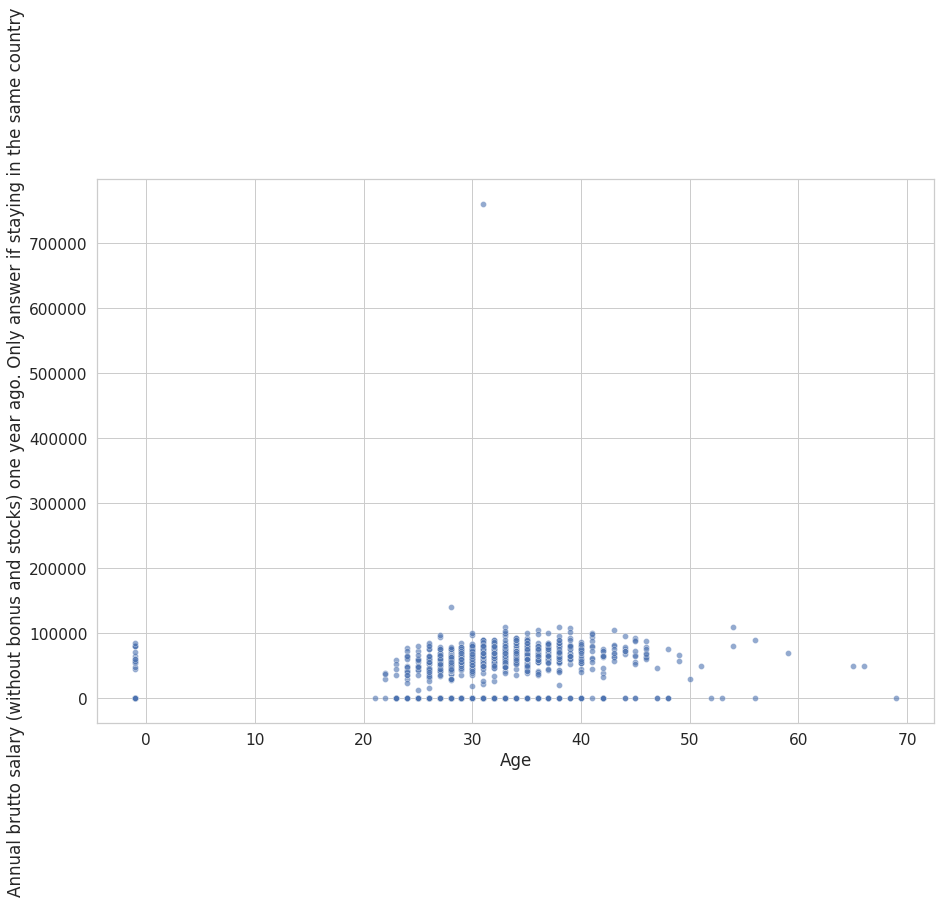

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.scatterplot(data=cod_df, x="Age", y="Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country", alpha=0.6)
plt.show() 

Зависимость ЗП за прошлый год от возраста. Имеется выброс (хотя фучу Annual brutto.. чистил в коде выше. Почему не почистилось, уже нет времени разбираться. 

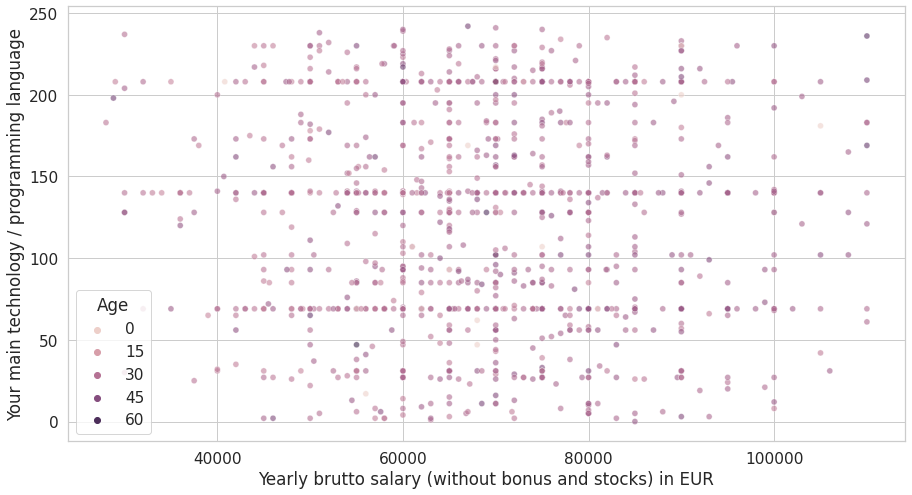

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=cod_df, x="Yearly brutto salary (without bonus and stocks) in EUR", y="Your main technology / programming language", hue="Age",alpha=0.6)
plt.show() 

Змоависисть зарплаты от языка програмирования и города не отслеживается. 

# Дополнительной задание (необязательно)
Здесь Вы можете выдвинуть различные гипотезы относительно данных: опровергнуть их, подтвердить, ну или хотя бы просто перечислить. Построить дополнительные графики, изменить логику преобразования данных (например, метода заполнения пустых значений), и провести любые другие манипуляции с данными, ведь анализ данных - это чистое творчество!